In [1]:
%load_ext autoreload
%autoreload 2
import numpy
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import sys
import os

# Calculating computatin time
import time

from jax.config import config
config.update("jax_enable_x64", True)
from jax import numpy as jnp

from gaussian_toolbox import timeseries
from gaussian_toolbox.timeseries import state_model, observation_model, ssm

In [2]:
# Run computation_time_nlss.py
# Run computation_time_rbf.py

In [3]:
#import numpy
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import solve_ivp
from scipy.stats import zscore

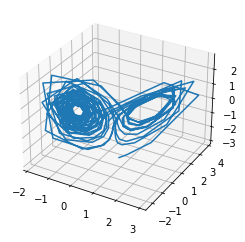

In [4]:
# Settings
# Noise
numpy.random.seed(0)
noise_level = .01

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def lorenz(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = numpy.linspace(0, 30, 300) #short trial

states = odeint(lorenz, state0, t)

X = states

X = zscore(X, axis=0)
X0 = X.copy()
X += noise_level * numpy.random.randn(*X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2])
plt.draw()
plt.show()

## Figures

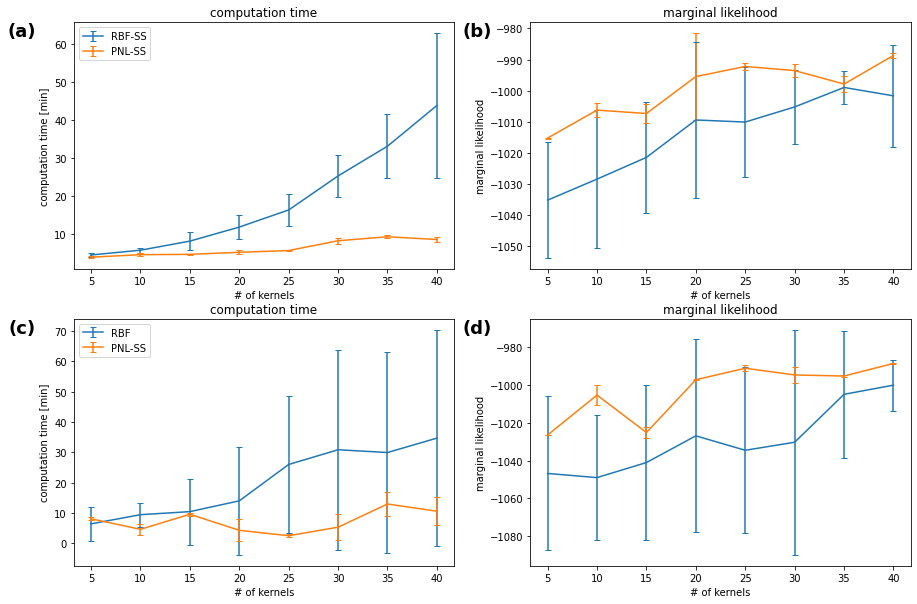

In [5]:
import pickle

f = open('data/lorentz_computation_time_nlss_fix.dat','rb')
param_list_nlss, computation_time_nlss, dimension_nlss, likelihood_nlss = pickle.load(f)
f.close

f = open('data/lorentz_computation_time_rbf_fix.dat','rb')
param_list_rbf, computation_time_rbf, dimension_rbf, likelihood_rbf = pickle.load(f)
f.close

#plt.figure(figsize=(15,10))
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)']
pos_l = [-0.1, 1.0]
ax[0,0].text(pos_l[0], pos_l[1], letters[0], 
             transform=ax[0, 0].transAxes, fontsize=18, weight='bold', va='top', ha='right')
ax[0,1].text(pos_l[0], pos_l[1], letters[1], 
             transform=ax[0, 1].transAxes, fontsize=18, weight='bold', va='top', ha='right')
ax[1,0].text(pos_l[0], pos_l[1], letters[2], 
             transform=ax[1, 0].transAxes, fontsize=18, weight='bold', va='top', ha='right')
ax[1,1].text(pos_l[0], pos_l[1], letters[3], 
             transform=ax[1, 1].transAxes, fontsize=18, weight='bold', va='top', ha='right')

plt.subplot(2,2,1)
plt.errorbar(param_list_rbf[0], numpy.mean(computation_time_rbf/60,0), yerr=2*numpy.std(computation_time_rbf/60,0), capsize=3)
plt.errorbar(param_list_nlss[0], numpy.mean(computation_time_nlss/60,0), yerr=2*numpy.std(computation_time_nlss/60,0), capsize=3)

plt.legend(['RBF-SS','PNL-SS'], loc='upper left')

plt.xlabel('# of kernels')
plt.ylabel('computation time [min]')
plt.title('computation time')

plt.subplot(2,2,2)
plt.errorbar(param_list_rbf[0], numpy.mean(likelihood_rbf,0), yerr=2*numpy.std(likelihood_rbf,0), capsize=3)
plt.errorbar(param_list_nlss[0], numpy.mean(likelihood_nlss,0), yerr=2*numpy.std(likelihood_nlss,0), capsize=3)


plt.xlabel('# of kernels')
plt.ylabel('marginal likelihood')
plt.title('marginal likelihood')



f = open('data/lorentz_computation_time_nlss_cri.dat','rb')
param_list_nlss, computation_time_nlss, dimension_nlss, likelihood_nlss = pickle.load(f)
f.close

f = open('data/lorentz_computation_time_rbf_cri.dat','rb')
param_list_rbf, computation_time_rbf, dimension_rbf, likelihood_rbf = pickle.load(f)
f.close

plt.subplot(2,2,3)
plt.errorbar(param_list_rbf[0], numpy.mean(computation_time_rbf/60,0), yerr=2*numpy.std(computation_time_rbf/60,0), capsize=3)
plt.errorbar(param_list_nlss[0], numpy.mean(computation_time_nlss/60,0), yerr=2*numpy.std(computation_time_nlss/60,0), capsize=3)

plt.legend(['RBF','PNL-SS'], loc='upper left')

plt.xlabel('# of kernels')
plt.ylabel('computation time [min]')
plt.title('computation time')


plt.subplot(2,2,4)
plt.errorbar(param_list_rbf[0], numpy.nanmean(likelihood_rbf,0), yerr=2*numpy.nanstd(likelihood_rbf,0), capsize=3)
plt.errorbar(param_list_nlss[0], numpy.mean(likelihood_nlss,0), yerr=2*numpy.std(likelihood_nlss,0), capsize=3)


plt.xlabel('# of kernels')
plt.ylabel('marginal likelihood')
plt.title('marginal likelihood')


plt.savefig('fig/lorentz_nlss_rbf.eps', format='eps')
plt.savefig('fig/lorentz_nlss_rbf.pdf', format='pdf')
plt.show()

\begin{figure}[tp]
\centering
\includegraphics[width=\linewidth]{fig/lorentz_nlss_rbf.eps}
\caption{Comparison of PNL-SS and RBF-SS in modeling a Lorentz attractor.
\textbf{a} Lorentz attractor and fitted models. 
\textbf{b} Marginal likelihoods of linear-SS (dashed black), PNL-SS (solid red) and RBF-SS (dashed blue) as a function of the EM iterations.
\textbf{c} Computational time required for completing 50 EM iterations for linear-SS, PNL-SS (red) and RBF-SS (black) as a function of the number of kernels. Note that the PNL-SS and RBF-SS model possess equal number of parameters. Computation was performed by Intel Xeon 6258R 2.7G with Tesla V100s using a custome code powered by Jax.
\textbf{d} Marginal likelihoods after completing 50 EM iterations.
\textbf{e} Computational time for each method until the same convergence criteria is satisfied. 
\textbf{f} Marginal likelihoods of each method after the convergence.
}
\label{fig:Lorentz}
\end{figure}